In [1]:
#Se hará una capa entrenable que representará un polinomio de grado 3: a_0 + a_1x + a_2x^2 + a_3x^3
#Los parámetros son los coeficientes a_0, a_1, a_2, a_3.
#Posteriormente , se entrenará para ajustarla a la funciˀón f(x)= cos(2)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from matplotlib import pyplot as plt
import numpy as np
import math

In [3]:
loss_tracker = keras.metrics.Mean(name="loss")
class Function(Sequential):
    @property
    def metrics(self):
        return [loss_tracker] #igual cambia el loss_tracker

    def train_step(self, data):
        batch_size =100 #Calibra la resolucion
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1)
        f = tf.math.cos(2*x)

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            #loss = keras.losses.mean_squared_error(y_pred,f)
            loss = tf.math.reduce_mean(tf.math.square(y_pred-f))

        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        #actualiza metricas
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}

class polinomio(tf.keras.layers.Layer):
    def __init__(self, num_outputs=3):
        super(polinomio,self).__init__()
        self.num_outputs = num_outputs

        self.freq = tf.range(0, self.num_outputs + 1)

        self.kernel = self.add_weight("kernel",
                                shape=[self.num_outputs +1])

    def call(self, inputs):
        x = tf.convert_to_tensor(inputs)
        if (inputs.shape == ()):
            inputs=(inputs,)
        elif (len(inputs.shape)==1):
            inputs=tf.expand_dims(inputs, axis=1)
        batch = tf.shape(inputs)[0]
        res = self.kernel[0] + self.kernel[1]*x +self.kernel[2]*x**2 + self.kernel[3]*x**3
        return tf.expand_dims(res, axis=1)

In [4]:
model_F = Function()
model_F.add(polinomio())
model_F.build(input_shape=(1,))
model_F.summary()

Model: "function"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 polinomio (polinomio)       (1, 1)                    4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model_F.compile(optimizer=Adam(learning_rate=0.01), metrics=['loss'])

In [6]:
x=tf.linspace(-1,1,100)
history2 = model_F.fit(x, epochs=1000, verbose=0)

[<tf.Variable 'kernel:0' shape=(4,) dtype=float32, numpy=array([ 0.95061177, -0.00307358, -1.4930552 , -0.00748071], dtype=float32)>]


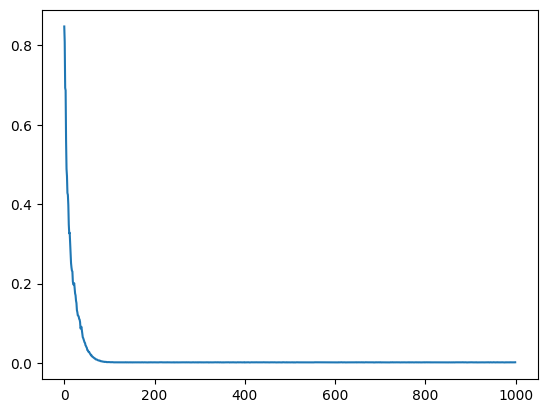

In [7]:
print(model_F.layers[0].trainable_weights)
plt.plot(history2.history["loss"])

4/4 [==============================] - 0s 3ms/step


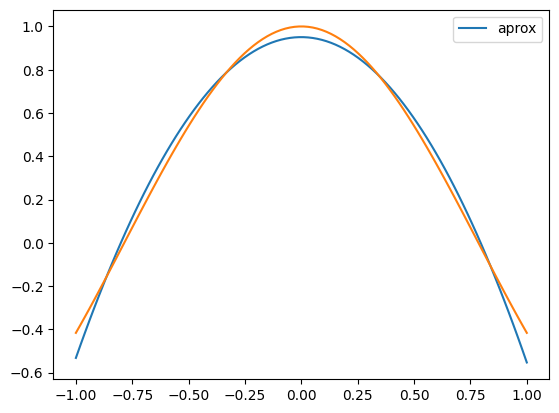

In [8]:
a=model_F.predict(x)
plt.plot(x,a,label="aprox")
plt.plot(x, tf.math.cos(2*x))
plt.legend()
plt.show()